In [1]:
import pickle
import numpy as np

In [2]:
with open('C:\\Users\\eobuobi\\trial\\nlp_project\\data\\final\\train_qa.txt', 'rb') as f:
    train_data = pickle.load(f)

In [3]:
with open('C:\\Users\\eobuobi\\trial\\nlp_project\\data\\final\\test_qa.txt', 'rb') as f:
    test_data = pickle.load(f)

In [4]:
type(test_data)

list

In [5]:
type(train_data)

list

In [6]:
len(train_data)

10000

In [7]:
len(test_data)

1000

In [8]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [9]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [10]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [11]:
train_data[0][2]

'no'

In [12]:
all_data = test_data + train_data

In [13]:
len(all_data)

11000

In [14]:
vocab = set()

In [15]:
for story, question, answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [16]:
vocab.add('no')

In [17]:
vocab.add('yes')

In [18]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [19]:
vocab_len = len(vocab) + 1

In [20]:
vocab_len

38

In [21]:
# LONGEST STORY
all_story_lens = [len(data[0]) for data in all_data]

In [22]:
max_story_len = max(all_story_lens)

In [23]:
max_question_len = max([len(data[1]) for data in all_data])

In [24]:
max_question_len

6

In [25]:
from keras_preprocessing.sequence import pad_sequences
from keras_preprocessing.text import Tokenizer

In [26]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [27]:
tokenizer.word_index

{'there': 1,
 'daniel': 2,
 'is': 3,
 'took': 4,
 'put': 5,
 'moved': 6,
 'to': 7,
 'dropped': 8,
 'sandra': 9,
 'picked': 10,
 'went': 11,
 'bedroom': 12,
 'john': 13,
 'apple': 14,
 'back': 15,
 'the': 16,
 'yes': 17,
 '.': 18,
 'bathroom': 19,
 'milk': 20,
 'got': 21,
 'discarded': 22,
 'travelled': 23,
 'mary': 24,
 'office': 25,
 'left': 26,
 'garden': 27,
 'hallway': 28,
 '?': 29,
 'up': 30,
 'grabbed': 31,
 'down': 32,
 'no': 33,
 'football': 34,
 'kitchen': 35,
 'in': 36,
 'journeyed': 37}

In [28]:
train_story_text = []
train_question_text = []
train_answers = []

In [29]:
for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
    train_answers.append(answer)

In [30]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [31]:
len(train_story_seq)

10000

In [32]:
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len=max_story_len,max_question_len=max_question_len):
    '''
    INPUT: 
    
    data: consisting of Stories,Queries,and Answers
    word_index: word index dictionary from tokenizer
    max_story_len: the length of the longest story (used for pad_sequences function)
    max_question_len: length of the longest question (used for pad_sequences function)


    OUTPUT:
    
    Vectorizes the stories,questions, and answers into padded sequences. We first loop for every story, query , and
    answer in the data. Then we convert the raw words to an word index value. Then we append each set to their appropriate
    output list. Then once we have converted the words to numbers, we pad the sequences so they are all of equal length.
    
    Returns this in the form of a tuple (X,Xq,Y) (padded based on max lengths)
    '''
    
    
    # X = STORIES
    X = []
    # Xq = QUERY/QUESTION
    Xq = []
    # Y = CORRECT ANSWER
    Y = []
    
    
    for story, query, answer in data:
        
        # Grab the word index for every word in story
        x = [word_index[word.lower()] for word in story]
        # Grab the word index for every word in query
        xq = [word_index[word.lower()] for word in query]
        
        # Grab the Answers (either Yes/No so we don't need to use list comprehension here)
        # Index 0 is reserved so we're going to use + 1
        y = np.zeros(len(word_index) + 1)
        
        # Now that y is all zeros and we know its just Yes/No , we can use numpy logic to create this assignment
        #
        y[word_index[answer]] = 1
        
        # Append each set of story,query, and answer to their respective holding lists
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    # Finally, pad the sequences based on their max length so the RNN can be trained on uniformly long sequences.
        
    # RETURN TUPLE FOR UNPACKING
    return (pad_sequences(X, maxlen=max_story_len),pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [33]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [34]:
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [35]:
inputs_test

array([[ 0,  0,  0, ..., 16, 12, 18],
       [ 0,  0,  0, ..., 16, 27, 18],
       [ 0,  0,  0, ..., 16, 27, 18],
       ...,
       [ 0,  0,  0, ..., 16, 14, 18],
       [ 0,  0,  0, ..., 16, 27, 18],
       [ 0,  0,  0, ..., 14,  1, 18]])

In [36]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
tokenizer.word_index['yes']

17

In [38]:
tokenizer.word_index['no']

33

In [39]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0., 497.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
       503.,   0.,   0.,   0.,   0.])

In [40]:
from keras.models import Sequential, Model
from keras.layers import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout
from keras.layers import add, dot, concatenate
from keras.layers import LSTM

In [41]:
# PLACEHOLDER shape(max_story_len, batch_size)
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

In [42]:
# vocab_len
vocab_size = len(vocab) + 1

In [43]:
# Input gets embedded to a sequence of vectors
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))

# This encoder will output:
# (samples, story_maxlen, embedding_dim)

In [44]:
# embed the input into a sequence of vectors of size query_maxlen
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))
# output: (samples, story_maxlen, query_maxlen)

In [45]:
# embed the question into a sequence of vectors
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,
                               output_dim=64,
                               input_length=max_question_len))
question_encoder.add(Dropout(0.3))
# output: (samples, query_maxlen, embedding_dim)

In [46]:
# encode input sequence and questions (which are indices)
# to sequences of dense vectors
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [47]:
# shape: `(samples, story_maxlen, query_maxlen)`
match = dot([input_encoded_m, question_encoded], axes=(2, 2))
match = Activation('softmax')(match)

In [48]:
response = add([match, input_encoded_c])  # (samples, story_maxlen, query_maxlen)
response = Permute((2, 1))(response)  # (samples, query_maxlen, story_maxlen)

In [49]:
answer = concatenate([response,question_encoded])

In [50]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate')>

In [51]:
answer = LSTM(32)(answer)

In [52]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer) # (sample,vocab_size) # YES/NO 0000

In [54]:
answer = Activation('softmax')(answer)

In [55]:
model = Model([input_sequence,question],answer)

In [56]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [57]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 156)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential (Sequential)        (None, None, 64)     2432        ['input_1[0][0]']                
                                                                                                  
 sequential_2 (Sequential)      (None, 6, 64)        2432        ['input_2[0][0]']                
                                                                                              

In [58]:
history = model.fit([inputs_train, queries_train], answers_train,batch_size=32,epochs=120,validation_data=([inputs_test, queries_test], answers_test))

Epoch 1/120
313/313 [==============================] - 10s 11ms/step - loss: 0.8743 - accuracy: 0.5061 - val_loss: 0.6948 - val_accuracy: 0.4970
Epoch 2/120
313/313 [==============================] - 3s 9ms/step - loss: 0.7043 - accuracy: 0.5070 - val_loss: 0.6933 - val_accuracy: 0.5030
Epoch 3/120
313/313 [==============================] - 3s 9ms/step - loss: 0.6968 - accuracy: 0.4966 - val_loss: 0.6932 - val_accuracy: 0.5030
Epoch 4/120
313/313 [==============================] - 3s 9ms/step - loss: 0.6951 - accuracy: 0.5009 - val_loss: 0.6937 - val_accuracy: 0.4970
Epoch 5/120
313/313 [==============================] - 3s 9ms/step - loss: 0.6951 - accuracy: 0.4938 - val_loss: 0.6948 - val_accuracy: 0.4970
Epoch 6/120
313/313 [==============================] - 3s 9ms/step - loss: 0.6945 - accuracy: 0.5029 - val_loss: 0.6938 - val_accuracy: 0.4970
Epoch 7/120
313/313 [==============================] - 3s 9ms/step - loss: 0.6939 - accuracy: 0.5108 - val_loss: 0.6939 - val_accuracy: 0.49

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


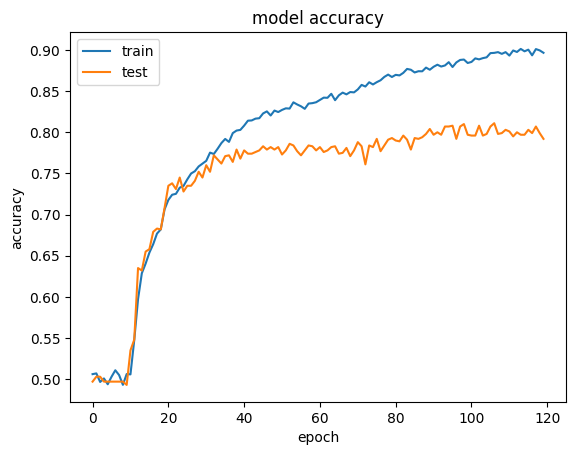

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [61]:
model.save('chatbot.h5')

In [62]:
model.load_weights('chatbot.h5')

In [63]:
pred_results = model.predict(([inputs_test, queries_test]))

32/32 [==============================] - 0s 5ms/step


In [65]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [68]:
pred_results[0]

array([6.9388370e-11, 7.1501333e-11, 7.7024803e-11, 7.4482191e-11,
       7.4451230e-11, 6.8165786e-11, 7.7504642e-11, 6.6829882e-11,
       7.6245725e-11, 6.9289838e-11, 7.2967500e-11, 7.2554900e-11,
       8.0539984e-11, 7.7123148e-11, 7.1496697e-11, 6.4843200e-11,
       7.2854438e-11, 1.2030798e-02, 7.1490425e-11, 6.8631129e-11,
       6.9830891e-11, 6.8320294e-11, 6.7585666e-11, 7.7220744e-11,
       7.4748319e-11, 6.5179737e-11, 6.5587036e-11, 7.3957424e-11,
       7.5562535e-11, 7.4307088e-11, 7.0363146e-11, 7.6827024e-11,
       7.0576454e-11, 9.8796916e-01, 7.8601979e-11, 7.8906312e-11,
       6.8656011e-11, 6.9921513e-11], dtype=float32)

In [69]:
val_max = np.argmax(pred_results[0])

In [70]:
for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  no
Probability of certainty was:  0.98796916


In [71]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [72]:
my_story = "John left the kitchen . Sandra dropped the football in the garden ."
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [73]:
my_question = "Is the football in the garden ?"

In [74]:
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [75]:
mydata = [(my_story.split(),my_question.split(),'yes')]

In [76]:
my_story,my_ques,my_ans = vectorize_stories(mydata)

In [77]:
pred_results = model.predict(([ my_story, my_ques]))

1/1 [==============================] - 0s 20ms/step


In [78]:
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  yes
Probability of certainty was:  0.9646612
